In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
# from plotly.subplots import make_subplots

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing.csv


In [ ]:
df = pd.read_csv('Housing.csv')
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Display the first few rows to understand the data
print("First 5 rows of the dataset:")
# print(housing_data.head())
print(df.head())

# Get a summary of the dataset including data types and non-null counts
print("\nDataset Information:")
df.info()

# Check for any missing values
print("\nMissing values in each column:")
# print(housing_data.isnull().sum())
print(df.isnull().sum())

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex

In [ ]:
fig = px.scatter_matrix(df,
                        dimensions=['area', 'bedrooms', 'bathrooms', 'stories', 'parking'],
                        color='price')
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
# figg = px.scatter_3d(df, x='area', y='bedrooms', z='price', color='price')
figg = px.scatter_3d(df, x='area', y='bedrooms', z='price')
figg.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df.drop(columns=["price"])
y = df["price"]


In [ ]:
# List of columns with 'yes'/'no' values
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Apply mapping to these columns
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Use pandas get_dummies for one-hot encoding of 'furnishingstatus'
# drop_first=True is used to avoid multicollinearity (a dummy variable trap)
furnishing_status_dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True, prefix='furnishing')

# Concatenate the new dummy columns with the original dataframe
df = pd.concat([df, furnishing_status_dummies], axis=1)

# Drop the original 'furnishingstatus' column as it's no longer needed
df.drop('furnishingstatus', axis=1, inplace=True)

# Display the first few rows of the processed data
print("\nProcessed data with numerical categories:")
print(df.head())

KeyError: 'furnishingstatus'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'no'

In [ ]:
# # Assignment 2: Multiple Linear Regression

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Load the dataset
# df = pd.read_csv("Housing.csv")

# # Display dataset information
# print("Dataset Head:\n", df.head())
# print("\nData Types:\n", df.dtypes)
# print("\nMissing Values:\n", df.isnull().sum())

# # Optional: Convert categorical to numeric if needed
# if 'mainroad' in df.columns:
#     df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})

# if 'furnishingstatus' in df.columns:
#     df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# # Define independent and dependent variables
# X = df.drop(columns=["price"])
# y = df["price"]

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluation
# print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
# print("R² Score:", r2_score(y_test, y_pred))

# # Coefficients
# coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
# print("\nFeature Importance:\n", coefficients.sort_values(by="Coefficient", ascending=False))

# # Plot Actual vs Predicted
# plt.figure(figsize=(8,6))
# plt.scatter(y_test, y_pred, alpha=0.6)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual vs Predicted House Prices")
# plt.grid(True)
# plt.show()


Dataset Head:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data Types:
 price                int64
area                 int64
bedrooms        

ValueError: could not convert string to float: 'no'

In [1]:
import numpy as np

class ScratchLinearRegression:

    def __init__(self):
        """Initializes the ScratchLinearRegression model."""
        self.coefficients = None

    def fit(self, X, y):
        # Add a intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Calculate the coefficients using the normal equation:
        # coefficients = (X_b^T * X_b)^-1 * X_b^T * y
        try:
            # np.linalg.inv computes the inverse of a matrix.
            # X_b.T computes the transpose of the X_b matrix.
            # @ is the matrix multiplication operator.
            self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        except np.linalg.LinAlgError:
            # Handle cases where the matrix is singular and cannot be inverted.
            # This can happen if there is perfect multicollinearity in the data.
            print("Error: The matrix is singular and cannot be inverted. "
                  "This may be due to multicollinearity in your data.")
            self.coefficients = None

    def predict(self, X):

        if self.coefficients is None:
            raise Exception("The model has not been fitted yet. "
                            "Please call the 'fit' method before making predictions.")

        # Add a bias term to the input features.
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Make predictions using the calculated coefficients.
        # The prediction is the dot product of the input features (with bias)
        # and the coefficients.
        predictions = X_b @ self.coefficients
        return predictions

In [2]:
from google.colab import files

# Open file upload dialog
uploaded = files.upload()

# If CSV file:
import pandas as pd
housing_data  = pd.read_csv(list(uploaded.keys())[0])
housing_data .head()

Saving Housing.csv to Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# --- Data Loading and Preprocessing (from the notebook) ---
# Assuming 'housing_data' is your preprocessed DataFrame
# ... (code for loading and cleaning the data would go here)




# Scaling the data
scaler = MinMaxScaler()
num_vars = ['price', 'area', 'bedrooms']
housing_data[num_vars] = scaler.fit_transform(housing_data[num_vars])

# Defining X and Y
X = housing_data[['area', 'bedrooms']]
y = housing_data['price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Convert to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values


# --- Using the ScratchLinearRegression Class ---

# 1. Create an instance of the model
scratch_model = ScratchLinearRegression()

# 2. Fit the model to the training data
scratch_model.fit(X_train_np, y_train_np)

# 3. Print the coefficients
print("Coefficients from scratch model:")
print(scratch_model.coefficients)

# 4. Make predictions on the test data
predictions = scratch_model.predict(X_test_np)
print("\nPredictions:")
print(predictions)

# 5. (Optional) Evaluate the model (e.g., using R-squared)
# You would need to implement this function from scratch as well if not using libraries.
def r2_score_scratch(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score_scratch(y_test_np, predictions)
print(f"\nR-squared from scratch: {r2:.4f}")



Coefficients from scratch model:
[0.00277095 0.55915944 0.32180134]

Predictions:
[0.17876064 0.29866287 0.4627214  0.27253033 0.32267142 0.23410013
 0.38377544 0.38377544 0.26504676 0.31941518 0.22046773 0.28713381
 0.2395469  0.6675928  0.26545917 0.30191911 0.42066844 0.22468473
 0.31979948 0.27463367 0.24101756 0.29000575 0.18959795 0.2343026
 0.18567807 0.12612158 0.30576213 0.27944777 0.34708492 0.36302314
 0.08058179 0.23102571 0.18626485 0.14395319 0.30020008 0.26176987
 0.20796759 0.22026526 0.14322302 0.24101756 0.1397643  0.19490132
 0.38608126 0.16031414 0.17568622 0.21124448 0.27944777 0.14207011
 0.1766573  0.38981931 0.11555327 0.29097683 0.33612199 0.33709307
 0.31211344 0.22661656 0.31403495 0.1589794  0.13822709 0.33996501
 0.133413   0.18913679 0.34380803 0.32172099 0.32823348 0.35338747
 0.57208343 0.1766573  0.13149149 0.40432528 0.12823524 0.32420863
 0.2294885  0.23717454 0.31019193 0.25695578 0.53595904 0.47831374
 0.46217306 0.2863652  0.42758587 0.14302055 0.1


Model Accuracy (R-squared score): 0.3637


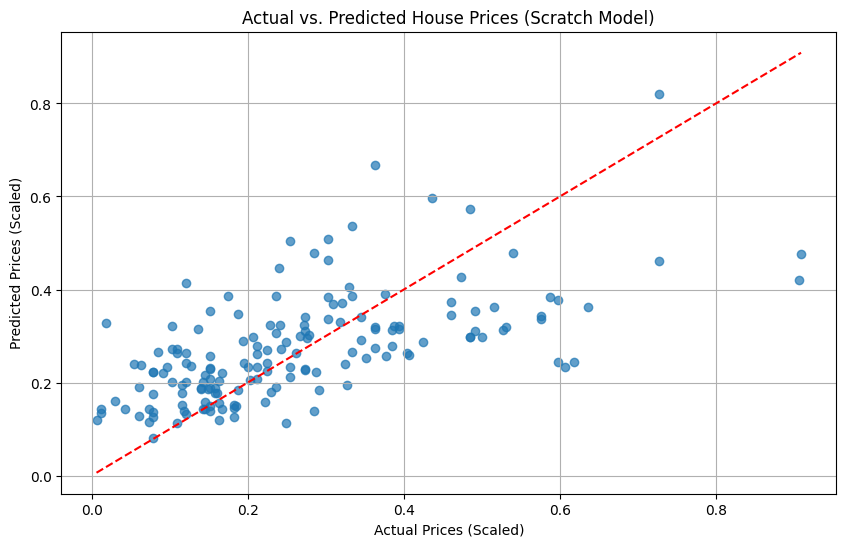

In [4]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy here as well for the r2_score_scratch function

# --- Model Evaluation (R-squared) ---

# R-squared function from scratch
def r2_score_scratch(y_true, y_pred):
    """Calculates the R-squared score from scratch."""
    # Sum of squared residuals
    ss_res = np.sum((y_true - y_pred)**2)
    # Total sum of squares

    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score_scratch(y_test_np, predictions) # Corrected variable name
print(f"\nModel Accuracy (R-squared score): {r2:.4f}")

# --- Visualization of Results ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, predictions, alpha=0.7) # Corrected variable name
plt.xlabel("Actual Prices (Scaled)")
plt.ylabel("Predicted Prices (Scaled)")
plt.title("Actual vs. Predicted House Prices (Scratch Model)")

# Add a line for perfect predictions (y = x)
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--')
plt.grid(True)
plt.show()